<a href="https://colab.research.google.com/github/reinereng/DNC/blob/main/Desafio_05_Dataset%20para%20a%20modelagem%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET DE UMA CAMPANHA DE MARKETING**

Desafio 04 do curso de Formação de Dados da DNC. Apesar de não solicitar no desafio, irei simular a aplicação de algumas fases do CRISP-DM

# CRISP-DM
https://www.datascience-pm.com/crisp-dm-for-data-science-teams-5-actions-to-consider/

## Passo 1: BUSINESS UNDERSTANDING

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade

## Passo 2: DATA UNDESTANDING

---

**Resultado Análise Exploratória:**

*   Os dados não possuem dados nulos e nem duplicados. São todos do mesmo formato, float e não apresentam inconsistência.  
*   Existe uma alta Correlação entre os leads gerados pelo **Youtube** e o **Facebook** com o **Retorno em vendas** (Sales).
* O investimento em Revistas não tem impacto significativo nas vendas, de modo que é recomendado a retirada desses investimentos ou **alteração em quais revistas está ocorrendo os anúncios**, para atender o público da empresa.  
* O investimento em no Facebook, apesar de ter alta correlação com as vendas, está com um nível de dispersão muito alto, é interessante fazer uma análise desses pontos e verificar uma possível mudança nos parâmetros do anúncio para otmizar as vendas.

---
**EXTRA**
* Os dados do **Youtube** estão com uma correlação **logarítmica** com as vendas, de modo que será feito um segundo modelo utilizando essa transformação.




In [ ]:
pip install pandas-profiling

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Banco de dados do projeto
df = pd.read_csv('/content/drive/MyDrive/Repositório Git/DNC/Desafio 04/MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Crie o relatório
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

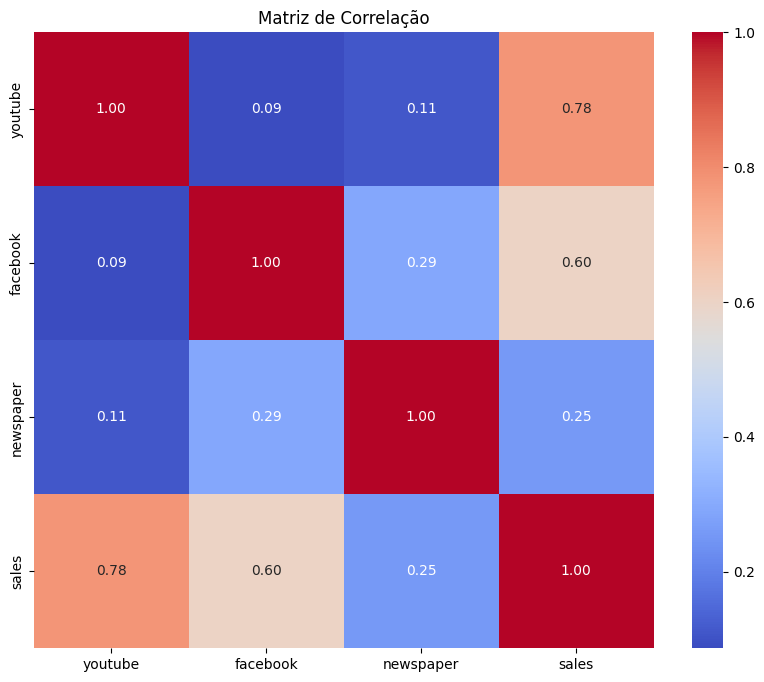

In [ ]:
correlacao = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



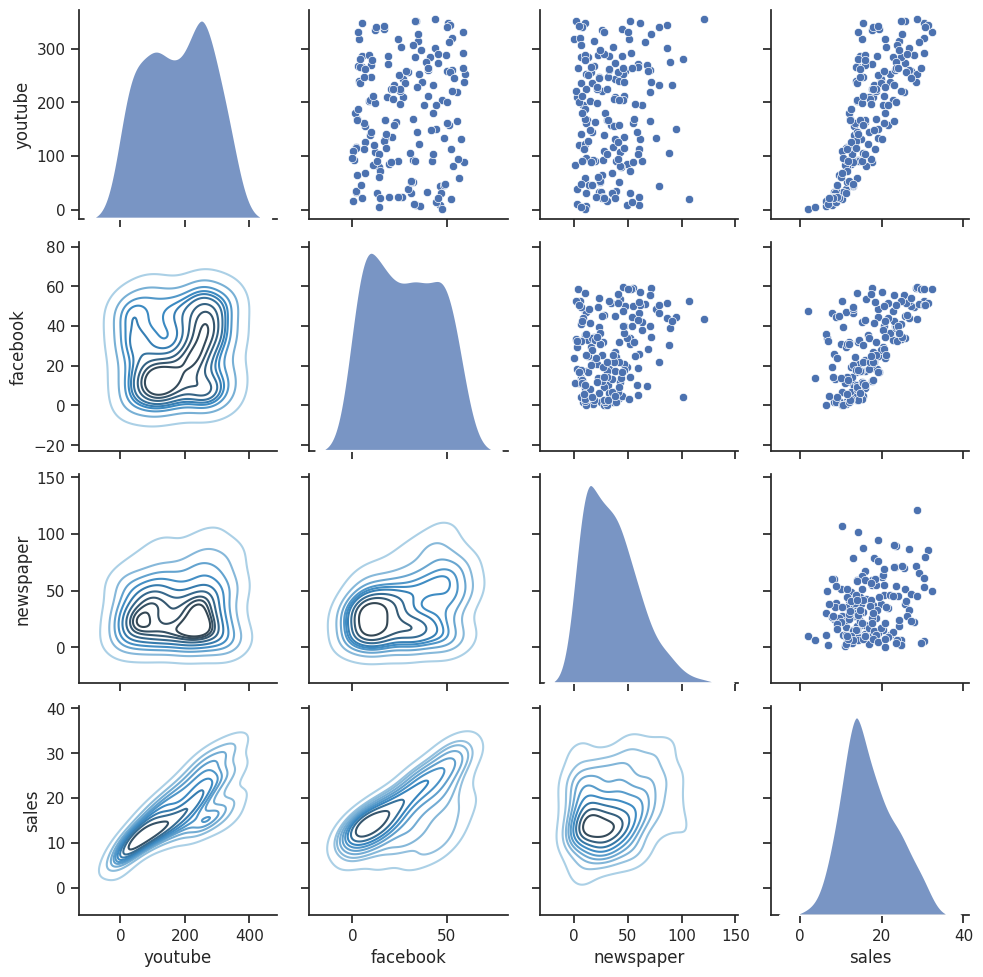

In [ ]:
# Criar a matriz de dispersão com histogramas nas diagonais e curvas gaussiana
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=2, multiple="stack")
plt.show()


## Passo 3: DATA PREPARATION

---
**Resultado Análise Exploratória:**

* **Foi realizado a definição das variáveis dependentes (X) e o alvo (Y)**
*   Não foi necessário realizar a limpeza dos dados, pois não apresentam inconsistência.  
*   Devido a quantidade de informações (apenas informações de leads gerados por canal de divulgação), não foi possível verificar atributos derivados dos dados.
*   Não houve necessidade de integração com outras planilhas.
*   Não houve necessidade de formatação dos dados, pois já estão no melhor apresentado.

In [ ]:
# Definir seus recursos (X) e alvo (y)
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

## Passo 4: MODELING

---
Será utilizado 2 modelos no dataset disponibilizado.

* Modelo 1: Regressão Linear (sem transformação de variáveis)
> * Modelo solicitado pelo cliente.
* Modelo 2: Regressão Linear com Tranformação da variável Youtube em log.
> * Percebe-se uma relação logarítmica da variável de leads vindas do Youtube com a vendas, e isso pode melhorar a previsão do modelo.
---
**Resultado:**

*   Para o **Modelo 1** foram testados 2 cenários:
> * **Cenário 1**: Com todas as variáveis
> * **Cenário 2**: Sem a variável *Newspaper* para confirmar o impacto no modelo, pois tem baixa correlação com a variável de vendas.

*   Para o **Modelo 2** foi testado 1 Cenário, e sem utilizar a variável *Newspaper*.

### Modelo 1 - Cenário 1


In [ ]:
# Separando a amostra em dois grupos: Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1 de Teste 1
model = LinearRegression()
model.fit(X_train, y_train)

# Realizando a Predição
y_pred_T1 = model.predict(X_test)

# Etapa de Avaliação do modelo
mse_T1 = mean_squared_error(y_test, y_pred_T1)
r2_T1 = r2_score(y_test, y_pred_T1)

print(f'MSE: {mse_T1:.3f}')
print(f'R²: {r2_T1:.3f}')


MSE: 5.576
R²: 0.873


### Modelo 1 - Cenário 2

In [ ]:
# Separando a amostra em dois grupos: Treinamento e Teste
X = df[['youtube', 'facebook']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1 de Teste 2
model_T2 = LinearRegression()
model_T2.fit(X_train, y_train)

# Realizando a Predição
y_pred_T2 = model_T2.predict(X_test)

# Etapa de Avaliação do modelo
mse_T2 = mean_squared_error(y_test, y_pred_T2)
r2_T2 = r2_score(y_test, y_pred_T2)

print(f'MSE: {mse_T2:.3f}')
print(f'R²: {r2_T2:.3f}')


MSE: 5.576
R²: 0.873


In [ ]:
# Análise de Sensibildiade Simples Modelo 1 - Cenário 2
ypred_T2 = model_T2.predict([[100,	100]])
print(f'Valor Predito com investimento em 100 para ambas as plataformas: {ypred_T2[0]:.2f}')

ypred_T2_Facebook = model_T2.predict([[100,	100+100]])
ganho_T2_Facebook = (ypred_T2_Facebook-ypred_T2)/ypred_T2*100
print(f'Valor Predito com aumento de 100% do Facebook: {ypred_T2_Facebook[0]:.2f}, aumento de {ganho_T2_Facebook[0]:.2f}%')

ypred_T2_Youtube = model_T2.predict([[100+100,	100]])
ganho_T2_Youtube = (ypred_T2_Youtube-ypred_T2)/ypred_T2*100
print(f'Valor Predito com aumento de 100% do Youtube: {ypred_T2_Youtube[0]:.2f}, aumento de {ganho_T2_Youtube[0]:.2f}%')

Valor Predito com investimento em 100 para ambas as plataformas: 27.57
Valor Predito com aumento de 100% do Facebook: 47.01, aumento de 70.54%
Valor Predito com aumento de 100% do Youtube: 31.99, aumento de 16.03%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Modelo 2 - Cenário 1

In [ ]:
# Separando a amostra em dois grupos: Treinamento e Teste
df['youtube_log'] = np.log(df['youtube'])

X = df[['youtube_log', 'facebook']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1 de Teste 2
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Realizando a Predição
y_pred2 = model2.predict(X_test)

# Etapa de Avaliação do modelo
mse_2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f'MSE: {mse_2:.3f}')
print(f'R²: {r2_2:.3f}')

MSE: 2.942
R²: 0.933


In [ ]:
# Análise de Sensibildiade Simples - Modelo 2
ypred2 = model2.predict([[np.log(100),	100]])
print(f'Valor Predito com investimento em 100 para ambas as plataformas: {ypred2[0]:.2f}')

ypred2_Facebook = model2.predict([[np.log(100),	100+100]])
ganho_Facebook = (ypred2_Facebook-ypred2)/ypred2*100
print(f'Valor Predito com aumento de 100% do Facebook: {ypred2_Facebook[0]:.2f}, aumento de {ganho_Facebook[0]:.2f}%')

ypred2_Youtube = model2.predict([[np.log(100+100),	100]])
ganho_Youtube = (ypred2_Youtube-ypred2)/ypred2*100
print(f'Valor Predito com aumento de 100% do Youtube: {ypred2_Youtube[0]:.2f}, aumento de {ganho_Youtube[0]:.2f}%')

Valor Predito com investimento em 100 para ambas as plataformas: 30.52
Valor Predito com aumento de 100% do Facebook: 51.09, aumento de 67.37%
Valor Predito com aumento de 100% do Youtube: 33.82, aumento de 10.79%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Passo 4: EVALUATION

---
*   **MODELO 1: Regressão linear - Teste 1**
$$Y_{Pred\ de \ Vendas} = a_1\cdot x_{Youtube}+a_2\cdot x_{Facebook}+a_3\cdot x_{Newspaper}$$
> *   Utilizado as 3 variáveis de leads (`X = df[['youtube', 'facebook', 'newspaper']] ` tem-se o seguinte resultado:
> > * MSE: 5.577
> > * R²: 0.873
> * É um bom resultado de correlação, e mostra que o modelo está funcionando bem.

*   **MODELO 1: Regressão linear - Teste 2**
$$Y_{Pred\ de \ Vendas} = a_1\cdot x_{Youtube}+a_2\cdot x_{Facebook}$$
> *   Foi retirado a variável *Newspaper*, pois não tem muita relevância.Utilizado 2 variáveis de leads (`X = df[['youtube', 'facebook'] ` tem-se o seguinte resultado:
> > * MSE: 5.576
> > * R²: 0.873
> * É um bom resultado de correlação, e mostra que o modelo está funcionando bem.
> * O resultado é um modelo mais rápido e mostra que é irrelevante a varíavel *Newspaper* nesse contexto, e que ela deve ser trabalhada para gerar leads melhores.

*   **MODELO 2: Regressão linear - Youtube com transformação log**
$$Y_{Pred\ de \ Vendas} = a_1\cdot \log{(x_{Youtube})}+a_2\cdot x_{Facebook}$$

> * Foi retirado a variável *Newspaper*, pois não tem muita relevância. E aplicado o Log no Youtube.
> * Utilizado 2 variáveis de leads (`X = df[['youtube_log', 'facebook'] ` tem-se o seguinte resultado:
> > * MSE: 2.942
> > * R²: 0.933
> * É um bom resultado de correlação, e mostra que o modelo está funcionando bem.


***O Modelo 2 possui um R² maior que os outros dois modelos e deve ser utilizado para predição de vendas (Sales)***

## Passo 5: DEPLOYMENT

* **Este Notebook está disponível para avaliação**

**PONTOS RELEVANTES**
*   O melhor modelo é considerando que a relação do investimento em leads advindo do Youtube é logartimo com as vendas. Isso significa que fazendo o mesmo investimento de forma igual na mesma plataforma, tem-se:
> > * Valor Predito com investimento em R\$ 100 para ambas as plataformas: Vendas = 30.52

> * **Facebook** trará resultados com possibilidades de ganhos maiores, mas com erro de predição também grande.
> > * Aumentar o investimento em 100% do Facebook (R\$ 200): Vendas = 51.09, aumento de 67.37%
> > * Investigar porque o investimento no Facebook é bem menor que o Youtube atualmente.
> > * Antes da Gestão investir massivamente neste produto, é importante fazer teste para aumentar a confiabilidade dessa variável no modelo.

> * **Youtube** trará resultados piores porém com uma alta confiabildiade. Ou seja, com possibilidades de ganhos maiores, mas com erro de predição também grande.
> > * Aumentar o investimento em 100% do Youtube (R\$ 200): Vendas = 33.82, aumento de 10.79%
> > * ***Recomenda-se o investimento nessa plataforma, que tem uma relação bem estabelecida com as vendas, com alto nível de confiabilidade.***

> * **Newspaper** O investimento nesta plataforma, precisa de revisão para saber o motivo do baixo impacto nas vendas.

> * *Para uma melhor análise, é importante saber de onde vem as vendas dos produtos, na base de dados informada está tudo junto e não é possível detalhar mais as causas e impactos nas vendas.*
